In [88]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize, least_squares
import matplotlib.pyplot as plt

In [89]:
a = -1.8
b = 2
n = 20

In [90]:
x = np.linspace(a, b, n)
e = np.random.normal(0, 1, n)
y = x * 2 + 2 + e

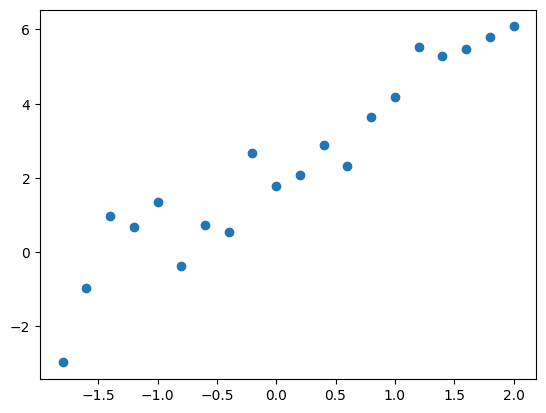

In [91]:
plt.scatter(x, y)

In [92]:
def lsm(x, y):
  xy_m = np.mean(x * y)
  x_m = np.mean(x)
  x_2_m = np.mean(x ** 2)
  y_m = np.mean(y)
  a = (xy_m - x_m * y_m) / (x_2_m - x_m * x_m)
  b = y_m - x_m * a
  return a, b

In [93]:
def lad(x, y):
  def abs_error(b, *data):
      x, y = data
      y_predict = b[0] + b[1] * x
      return np.linalg.norm(y - y_predict, ord=1)

  b, a = sp.optimize.minimize(abs_error, [0, 1], args=(x, y)).x

  return a, b

## Метод наименьших квадратов

In [94]:
a_sq, b_sq = lsm(x, y)
a_sq, b_sq

(1.9976254386523817, 2.1836423731018657)

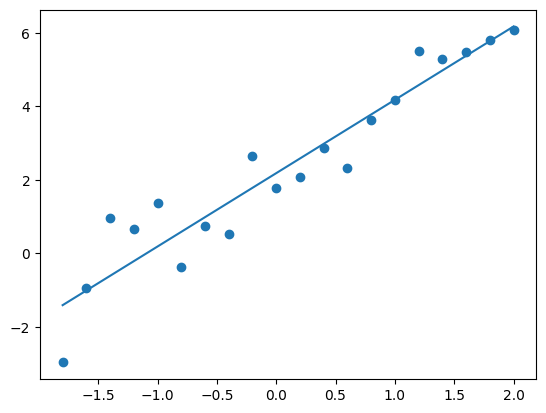

In [95]:
plt.scatter(x, y)

x_p = np.linspace(a, b, 100)
y_p = x_p * a_sq + b_sq
plt.plot(x_p, y_p)

## Метод наименьших модулей

In [96]:
a_abs, b_abs = lad(x, y)
a_abs, b_abs

(2.083962592042741, 2.048015012980349)

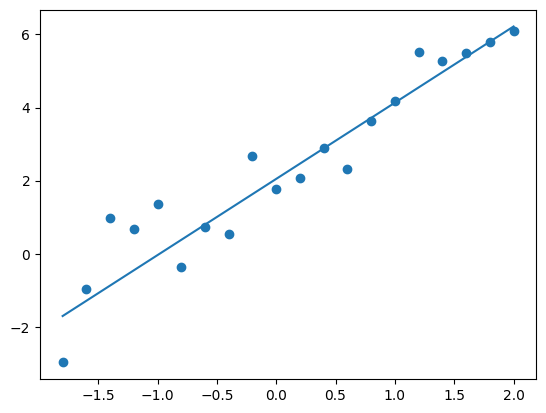

In [97]:
plt.scatter(x, y)

x_p = np.linspace(a, b, 100)
y_p = x_p * a_abs + b_abs
plt.plot(x_p, y_p)

## С возмущениями

In [98]:
x_mod = x.copy()
y_mod = y.copy()
y_mod[0] += 10
y_mod[-1] -= 10

In [99]:
a_sq_mod, b_sq_mod = lsm(x_mod, y_mod)
a_sq_mod, b_sq_mod

(0.5690540100809528, 2.326499515959009)

In [100]:
a_abs_mod, b_abs_mod = lad(x_mod, y_mod)
a_abs_mod, b_abs_mod

(1.9764090555575207, 2.205830214416439)

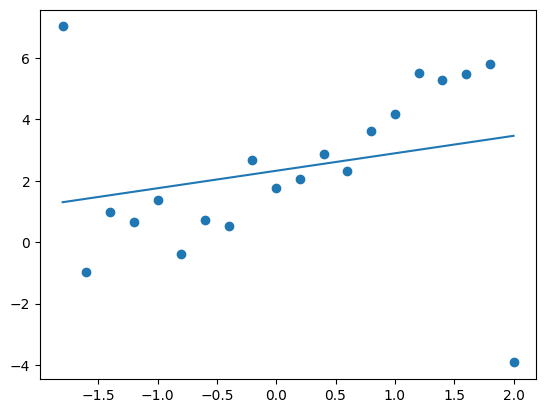

In [101]:
plt.scatter(x, y_mod)

x_p = np.linspace(a, b, 100)
y_p = x_p * a_sq_mod + b_sq_mod
plt.plot(x_p, y_p)

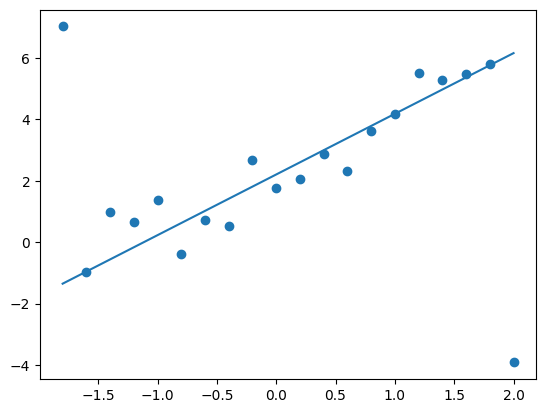

In [102]:
plt.scatter(x, y_mod)

x_p = np.linspace(a, b, 100)
y_p = x_p * a_abs_mod + b_abs_mod
plt.plot(x_p, y_p)

In [103]:
abs(a_sq - a_sq_mod) / a_sq, abs(b_sq - b_sq_mod) / b_sq

(0.7151347799891643, 0.06542149237295417)

In [104]:
abs(a_abs - a_abs_mod) / a_abs, abs(b_abs - b_abs_mod) / b_abs

(0.05161010897983269, 0.07705763895081569)